<a href="https://colab.research.google.com/github/thomas-barrais/Projet-Eolienne/blob/main/Groupe08_ProjetEol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> <center> <b> Projet de modélisation numérique </b> </center> </h1>

<h2> <b> Introduction </b> </h2> 

Le but de ce projet est de calculer numériquement la courbe de puissance d'une éolienne et de déterminer si une éolienne domestique peut fournir suffisament d'énergie pour alimenter un foyer. Nous allons découper ce projet en plusieurs étapes clés : 

<dt> <A HREF="#Données"> Analyse de données </A> </dt>
<dd> Détermination de l'angle d'incidence optimale et des coefficients $C_p$ et $C_t$ à cet angle </dd>
<dd> Mis en évidence du phénomène de décrochage </dd> 
<dt> <A HREF="#Numérique"> Modèle numérique </A> </dt> 
<dd> Calcul de la puissance </dd>
<dd> Ordres de grandeur </dd>
<dt> <A HREF="#Analytique"> Modèle analytique </A> </dt>
<dd> Calcul de puissance </dd>
<dd> Grandeurs remarquables </dd>
<dt> <A HREF="#Conclusion"> Conclusion </A> </dt>
<dd> Comparaison des modèles </dd>
<dd> Une éolienne pour alimenter un foyer </dd>
<dd> Les limites de notre modèle numérique </dd>

<h2> <b> PARTIE 1 - Modélisation aérodynamique d'une éolienne </b> </h2>

<h3 ID="Données"> <b> I - Analyse de données </b> </h3>
1 - Détermination de l'angle d'incidence optimale et des coefficients $C_p$ et $C_t$ à cet angle 

Les 2 forces résultantes de la force du vent sont : 

<ol> 
<li>La portance</li> 
<li>La trainée </li>
</ol>

Nous pouvons dans un premier temps, calculer l'expression de leur force à partir de l'équation de Bernoulli :

$$P + \frac{1}{2}\rho v^2 + \rho g h = cste $$

Nous obtenons deux expresssions de la forme :
$$ F_p = \frac{1}{2}\rho V_r^2 S C_p(\alpha) $$
$$ F_t = \frac{1}{2}\rho V_r^2 S C_t(\alpha) $$

Nous avons ainsi 3 inconnues à déterminer pour pouvoir utiliser ces équations. Pour cela, nous utilisons des bases de données de 3 profils de pâles NACA comprenant :
<ul>
<li> L'angle d'incidence $\alpha$ </li>
<li> Le coefficient de portance $C_p$ </li>
<li> Le coefficient de trainée $C_t$ </li>
</ul>

Nous allons donc dans un premier temps analyser ces données pour obtenir l'angle d'incidence optimale ainsi que les 2 coefficients correspondant à cet angle. Les donées étudiées étant discrètes et de forme d'équations polynomiales, nous devons donc utiliser une méthode de régression polynomiale pour rendre ces données exploitable. Pour ce faire, nous avons décidé de comparer 2 méthodes :
<ul>
<li> La méthode PolynomialFeatures de la bibliothèque sklearn </li>
<li> La méthode matricielle appliquée à $C_p$ et $C_t$ </li>
<li> Les 2 méthodes produisent des résultats identiques lorsque l'on trouve le bon degré de régression. </li>
</ul>

Les coefficient $C_p$ et $C_t$ sont obtenus en définissant la finesse: la finesse correspond au rapport $\frac{C_p}{C_t}$. Nous voulons maximiser la portance et minimiser la trainée. Ainsi, en déterminant le maximum de cette fonction, nous pouvons trouver $\alpha_{optimale}$.

Mounted at /content/gdrive/


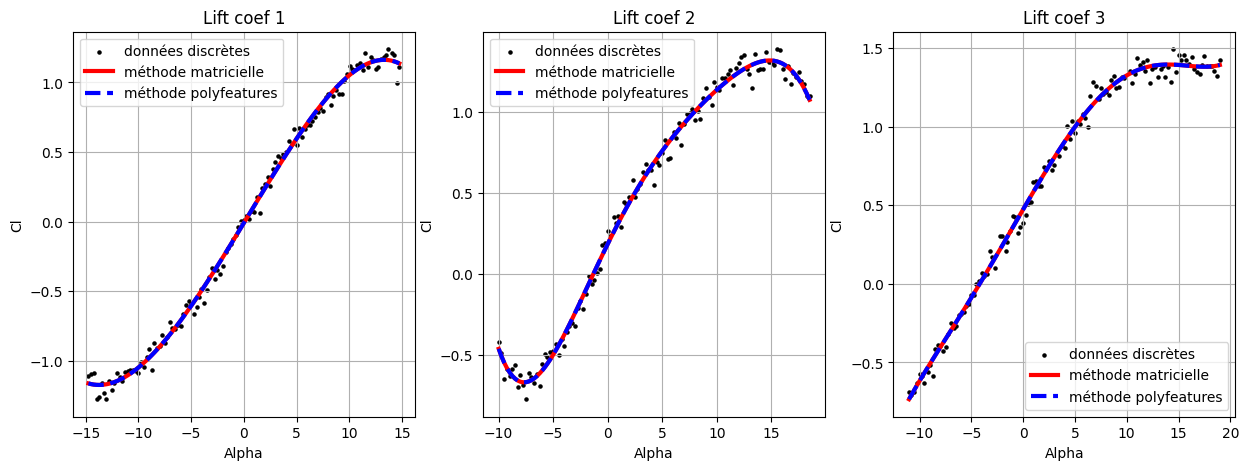

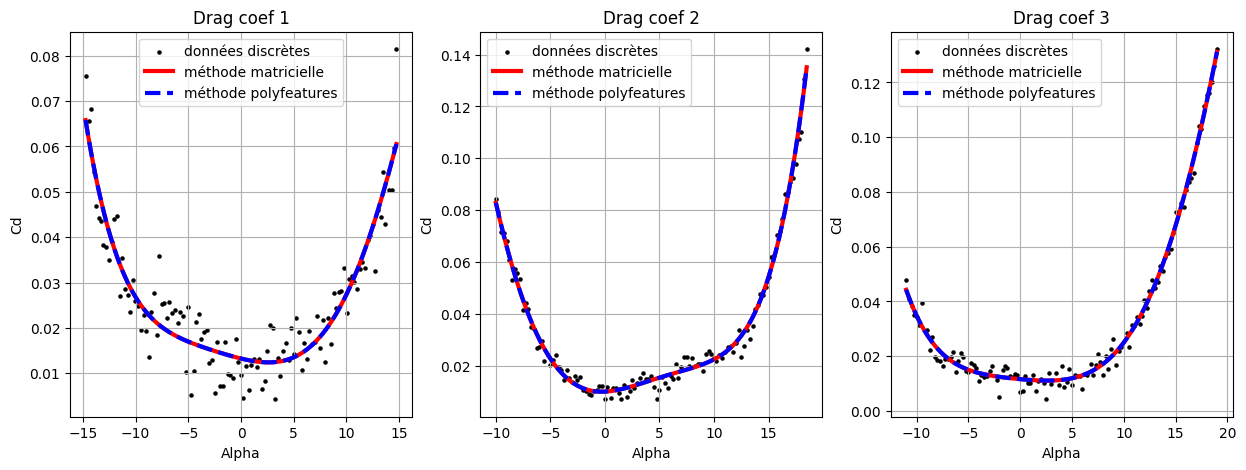

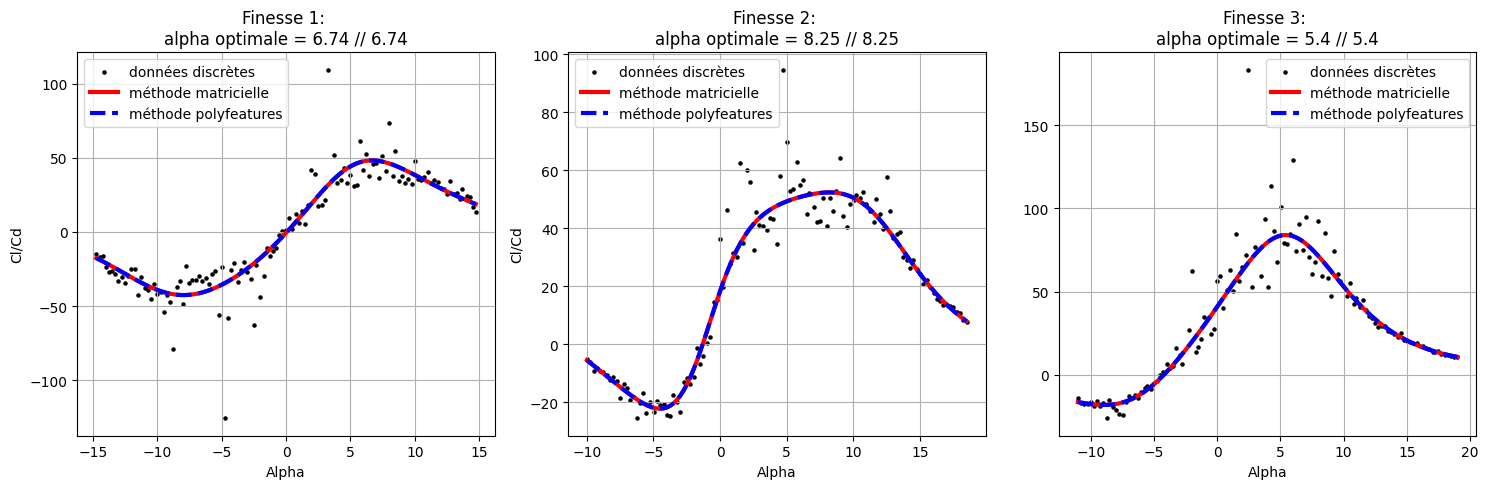

alpha optimale = 6.796310521998549
Cl = 0.9455748452045349
Cd = 0.01601022498414753


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount = True)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

donnees = np.genfromtxt('/content/gdrive/MyDrive/'+'naca_0012.txt', delimiter=',', names = True)
donnees2 = np.genfromtxt('/content/gdrive/MyDrive/'+'naca_23012.txt', delimiter=',', names = True)
donnees3 = np.genfromtxt('/content/gdrive/MyDrive/'+'naca_4412.txt', delimiter=',', names = True)

alpha, cd, cl = donnees['alpha'], donnees['Cd'], donnees['Cl']
alpha2, cd2, cl2 = donnees2['alpha'], donnees2['Cd'], donnees2['Cl']
alpha3, cd3, cl3 = donnees3['alpha'], donnees3['Cd'], donnees3['Cl']

def puissance(a, b):
  return np.power(a, b)

def polynomial_regression(X, y, dg):
    
  x_range = np.linspace(min(X), max(X), len(X))
  X=X.reshape(-1,1)
  for i in range(2, dg + 1):
    X = np.c_[X, puissance(X[:, 0],i)]

  # Ajout d'une colonne de 1 pour le terme constant
  X = np.c_[np.ones(X.shape[0]), X]

  # Calcul des coefficients de régression
  beta = np.linalg.inv(X.T @ X) @ X.T @ y

  # Expression du polynome
  ans = 0
  for i in range(dg + 1):
    ans += beta[i]*puissance(x_range, i)
    i += 1
  return ans

def polyfeatures_regression(x, y, dg):

  x_range = np.linspace(min(x), max(x), len(x))
  
  Y = y.reshape(len(y), 1)
  X = x.reshape(len(x), 1)
  poly_features = PolynomialFeatures(degree = dg, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  
  reg = LinearRegression()
  reg.fit(X_poly, Y)
  
  X_vals = x_range.reshape(-1, 1)
  X_vals_poly = poly_features.transform(X_vals)
  Y_vals = reg.predict(X_vals_poly)

  return Y_vals

def afficher_polynomial_regression(alpha, cl, cd, alpha2, cl2, cd2, alpha3, cl3, cd3, dg):
    
  # Calcul de la régression polynomiale avec la méthode matricielle
  x_range = np.linspace(min(alpha), max(alpha), len(alpha))
  x_range2 = np.linspace(min(alpha2), max(alpha2), len(alpha2))
  x_range3 = np.linspace(min(alpha3), max(alpha3), len(alpha3))

  y_range_cl = polynomial_regression(alpha, cl, dg)
  y_range_cl_2 = polynomial_regression(alpha2, cl2, dg)
  y_range_cl_3 = polynomial_regression(alpha3, cl3, dg)

  y_range_cd = polynomial_regression(alpha, cd, dg)
  y_range_cd_2 = polynomial_regression(alpha2, cd2, dg)
  y_range_cd_3 = polynomial_regression(alpha3, cd3, dg)

  # Trouver l'indice de la valeur maximale dans chaque liste
  imax = np.argmax(y_range_cl / y_range_cd)
  imax2 = np.argmax(y_range_cl_2 / y_range_cd_2)
  imax3 = np.argmax(y_range_cl_3 / y_range_cd_3)

  # Calcul de la régression polynomiale avec la méthode polyfeatures
  x_vals = x_range.reshape(-1, 1)
  x_vals2 = x_range2.reshape(-1, 1)
  x_vals3 = x_range3.reshape(-1, 1)

  y_vals_cl = polyfeatures_regression(alpha, cl, dg)
  y_vals_cl2 = polyfeatures_regression(alpha2, cl2, dg)
  y_vals_cl3 = polyfeatures_regression(alpha3, cl3, dg)

  y_vals_cd = polyfeatures_regression(alpha, cd, dg)
  y_vals_cd2 = polyfeatures_regression(alpha2, cd2, dg)
  y_vals_cd3 = polyfeatures_regression(alpha3, cd3, dg)
    
  # Trouver l'indice de la valeur maximale dans chaque liste
  indice_max = np.argmax(y_vals_cl / y_vals_cd)
  indice_max2 = np.argmax(y_vals_cl2 / y_vals_cd2)
  indice_max3 = np.argmax(y_vals_cl3 / y_vals_cd3)

  # Affichage des données et de leurs régression polynomiale pour chaque grandeur aero
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  axs[0].scatter(alpha, cl, s=5, color="black", label="données discrètes")
  axs[0].set_title('Lift coef 1')
  axs[0].set_xlabel('Alpha')
  axs[0].set_ylabel('Cl')
  axs[0].plot(x_range, y_range_cl, 'r', linewidth=3, label='méthode matricielle')
  axs[0].plot(x_vals, y_vals_cl, color='b', linestyle='--', linewidth=3, label='méthode polyfeatures')
  axs[0].legend()
  axs[0].grid()

  axs[1].scatter(alpha2, cl2, s=5, color="black", label="données discrètes")
  axs[1].set_title('Lift coef 2')
  axs[1].set_xlabel('Alpha')
  axs[1].set_ylabel('Cl')
  axs[1].plot(x_range2, y_range_cl_2, 'r', linewidth=3, label='méthode matricielle')
  axs[1].plot(x_vals2, y_vals_cl2, color='b', linestyle='--', linewidth=3, label='méthode polyfeatures')
  axs[1].legend()
  axs[1].grid()

  axs[2].scatter(alpha3, cl3, s=5, color="black", label="données discrètes")
  axs[2].set_title('Lift coef 3')
  axs[2].set_xlabel('Alpha')
  axs[2].set_ylabel('Cl')
  axs[2].plot(x_range3, y_range_cl_3, 'r', linewidth=3, label='méthode matricielle')
  axs[2].plot(x_vals3, y_vals_cl3, color='b', linestyle='--', linewidth=3, label='méthode polyfeatures')
  axs[2].legend()
  axs[2].grid()

  fig2, axs2 = plt.subplots(1, 3, figsize=(15, 5))
  axs2[0].scatter(alpha, cd, s=5, color="black", label="données discrètes")
  axs2[0].set_title('Drag coef 1')
  axs2[0].set_xlabel('Alpha')
  axs2[0].set_ylabel('Cd')
  axs2[0].plot(x_range, y_range_cd, 'r', linewidth=3, label='méthode matricielle')
  axs2[0].plot(x_vals, y_vals_cd, color='b', linestyle='--', linewidth=3, label='méthode polyfeatures')
  axs2[0].legend()
  axs2[0].grid()

  axs2[1].scatter(alpha2, cd2, s=5, color="black", label="données discrètes")
  axs2[1].set_title('Drag coef 2')
  axs2[1].set_xlabel('Alpha')
  axs2[1].set_ylabel('Cd')
  axs2[1].plot(x_range2, y_range_cd_2, 'r', linewidth=3, label='méthode matricielle')
  axs2[1].plot(x_vals2, y_vals_cd2, color='b', linestyle='--', linewidth=3, label='méthode polyfeatures')
  axs2[1].legend()
  axs2[1].grid()

  axs2[2].scatter(alpha3, cd3, s=5, color="black", label="données discrètes")
  axs2[2].set_title('Drag coef 3')
  axs2[2].set_xlabel('Alpha')
  axs2[2].set_ylabel('Cd')
  axs2[2].plot(x_range3, y_range_cd_3, 'r', linewidth=3, label='méthode matricielle')
  axs2[2].plot(x_vals3, y_vals_cd3, color='b', linestyle='--', linewidth=3, label='méthode polyfeatures')
  axs2[2].legend()
  axs2[2].grid()

  # Affichage de la finesse et de l'angle de finesse optimale
  fig3, axs3 = plt.subplots(1, 3, figsize=(15, 5))
  axs3[0].scatter(alpha, cl/cd, s=5, color='black', label="données discrètes")
  axs3[0].set_title("Finesse 1: "+'\n'+"alpha optimale = "+str(round(x_range[imax], 2))+" // "+str(round(float(x_vals[indice_max]), 2)))
  axs3[0].set_xlabel('Alpha')
  axs3[0].set_ylabel('Cl/Cd')
  axs3[0].plot(x_range, y_range_cl / y_range_cd, 'r', linewidth=3, label='méthode matricielle')
  axs3[0].plot(x_vals, y_vals_cl / y_vals_cd, 'b', linestyle='--', linewidth=3, label='méthode polyfeatures')
  axs3[0].legend()
  axs3[0].grid()

  axs3[1].scatter(alpha2, cl2/cd2, s=5, color='black', label="données discrètes")
  axs3[1].set_title("Finesse 2: "+'\n'+"alpha optimale = "+str(round(x_range2[imax2], 2))+" // "+str(round(float(x_vals2[indice_max2]), 2)))
  axs3[1].set_xlabel('Alpha')
  axs3[1].set_ylabel('Cl/Cd')
  axs3[1].plot(x_range2, y_range_cl_2 / y_range_cd_2, 'r', linewidth=3, label='méthode matricielle')
  axs3[1].plot(x_vals2, y_vals_cl2 / y_vals_cd2, 'b', linestyle='--', linewidth=3, label='méthode polyfeatures')
  axs3[1].legend()
  axs3[1].grid()

  axs3[2].scatter(alpha3, cl3/cd3, s=5, color="black", label="données discrètes")
  axs3[2].set_title("Finesse 3: "+'\n'+"alpha optimale = "+str(round(x_range3[imax3], 2))+" // "+str(round(float(x_vals3[indice_max3]), 2)))
  axs3[2].set_xlabel('Alpha')
  axs3[2].plot(x_range3, y_range_cl_3 / y_range_cd_3, 'r', linewidth=3, label='méthode matricielle')
  axs3[2].plot(x_vals3, y_vals_cl3 / y_vals_cd3, 'b', linestyle='--', linewidth=3, label='méthode polyfeatures')
  axs3[2].legend()
  axs3[2].grid()
    
  plt.tight_layout()
  plt.show()
    
  alpha_opti = (x_range[imax] + x_range2[imax2] + x_range3[imax3]) / 3
  s = (y_range_cl[imax] + y_range_cl_2[imax2] + y_range_cl_3[imax3]) / 3
  s2 = (y_range_cd[imax] + y_range_cd_2[imax2] + y_range_cd_3[imax3]) / 3

  print("alpha optimale = " + str(float(alpha_opti)) + '\n' + "Cl = " + str(float(s)) +'\n'+ "Cd = " + str(float(s2)))

afficher_polynomial_regression(alpha, cl, cd, alpha2, cl2, cd2, alpha3, cl3, cd3, 5)


<h3> 2 - Mise en évidence du phénomène de décrochage </h3>

Le décrochage est un phénomène qui peut se produire sur les pales d'une éolienne lorsque le vent souffle à des vitesses élevées. Ce phénomène se produit lorsque le vent frappe la face convexe de la pale, créant une zone de basse pression sur cette face et une zone de haute pression sur la face concave de la pale.

Lorsque la différence de pression entre les deux faces de la pale devient suffisamment importante, le flux d'air ne peut plus suivre la courbure de la pale et se détache de la surface de la pale. Cela crée une zone de turbulence qui réduit la portance de la pale et donc la quantité d'énergie que l'éolienne peut produire.

Pour éviter le décrochage, les pales d'une éolienne sont conçues avec une forme aérodynamique qui permet de réduire les turbulences et de maintenir le flux d'air collé à la surface de la pale même à des vitesses élevées. Les pales peuvent également être équipées de volets mobiles pour réduire la force exercée sur les pales et ainsi éviter le décrochage. De plus, au-delà d'une certaine vitesse de vent, l'éolienne cesse de fonctionner. 

Le décrochage peut causer des dommages à la structure de l'éolienne et augmenter le risque d'accidents. Lorsque l'éolienne décroche, elle peut perdre son équilibre et commencer à osciller de manière incontrôlable. Cela peut entraîner des tensions excessives sur les pales de l'éolienne et sur les autres composants de la structure, ce qui peut causer des dommages importants. 

source :
<a href="http://xn--drmstrre-64ad.dk/wp-content/wind/miller/windpower%20web/fr/tour/wtrb/stall.htm#:~:text=Le%20d%C3%A9crochage%20peut%20avoir%20lieu%20si%20la%20surface,l%27extrados%2C%20m%C3%AAme%20lorsque%20l%27angle%20d%27attaque%20est%20assez%20petit"> Décrochage d'une pâle d'éolienne/d'avion </a>


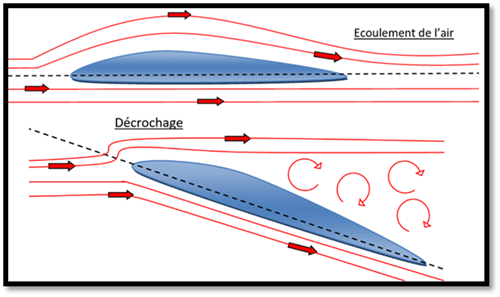

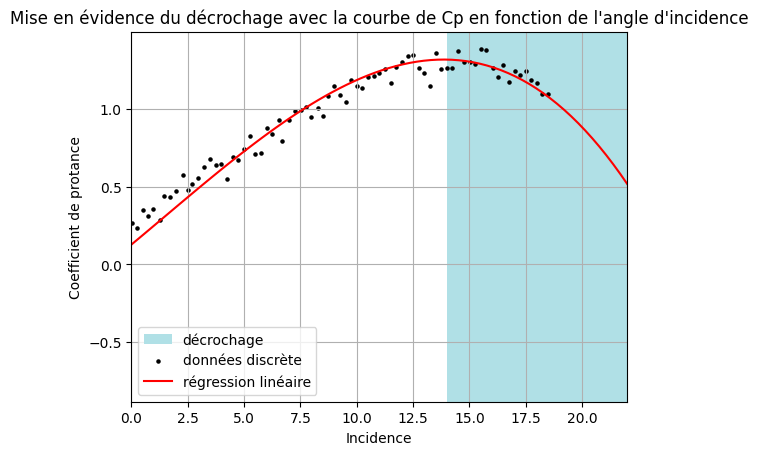

In [ ]:
donnees2 = np.genfromtxt ('/content/gdrive/MyDrive/'+'naca_23012.txt', delimiter=',', names = True)

x, y2 = donnees2['alpha'], donnees2['Cl']

def puissance(x, y):
  return np.power(x, y)

# regression polynomiale
def polynomial_regression(X, y, degree):
  X=X.reshape(-1,1)
  for i in range(2, degree + 1):
    X = np.c_[X, puissance(X[:, 0],i)]

  # Ajout d'une colonne de 1 pour le terme constant
  X = np.c_[np.ones(X.shape[0]), X]

  # Calcul des coefficients de régression
  beta = np.linalg.inv(X.T @ X) @ X.T @ y
  return beta

beta = polynomial_regression(x, y2, 3)
x_range = np.linspace(min(alpha), 22, 119)
y_range = beta[0] + beta[1]*x_range + beta[2]*puissance(x_range, 2) + beta[3]*puissance(x_range, 3)

# Affichage du décrochage
plt.xlabel('Incidence')
plt.ylabel('Coefficient de protance')
plt.title("Mise en évidence du décrochage avec la courbe de Cp en fonction de l'angle d'incidence")
plt.xlim(0, 22)
ax = plt.gca()
ax.axvspan(14, 22, facecolor='powderblue', label='décrochage')
plt.scatter(x, y2, s=5, color='black', label='données discrète')
plt.plot(x_range, y_range, color='r', label='régression linéaire')
plt.legend()
plt.grid()
plt.show()

<h2 ID="Numérique"> <b> II - Modèle numérique </b> </h2>

<h3> Les grandeurs physiques de notre système </h3>

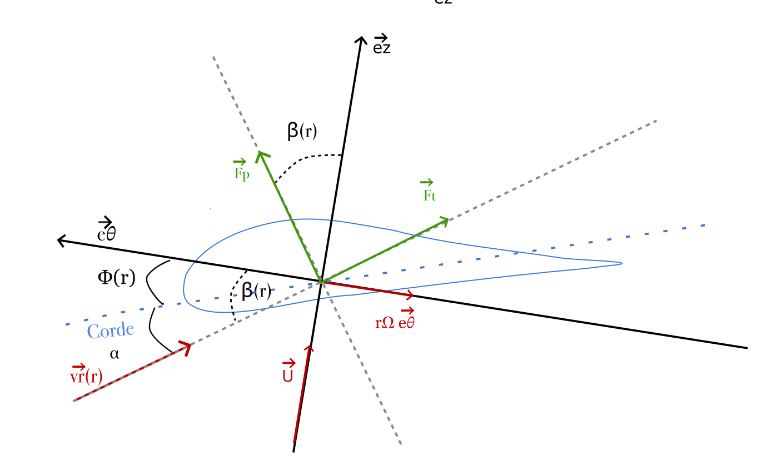

<ul>
<li> $\Phi(r)$ correspond à l'angle formé par le vent par rapport à la corde de l'éolienne </li>
<li> $\beta(r)$ correspond à l'angle d'inclinaison entre le plan formé par les pâles de l'éolienne et le sens du vent </li>
<li> $\alpha$ correspond à l'angle d'attaque de la pâle </li>
<li> $\vec{U}$ correspond à la vitesse du vent </li>
<li> $\vec{V_r}(r)$ correspond à la vitesse relative du vent </li>
<li> $r\Omega \vec{e_{\theta}}$ correspond à la vitesse de la pâle en $m.s^{-1}$ </li>
<li> $F_p$ et $F_t$ sont les forces de poussée et de trainée </li>
</ul>

Les forces qui s'appliquent sur notre pâle sont donc :
<ol>
<li> La force du vent dont résulte : </li>
<ul> 
<li> La force de poussée qui permet de faire tournée la pâle </li>
<li> La force de trainée qui ralentit le mouvement de la pâle </li>
</ul>
<li> Le poids de la pâle </li>
</ol>

La pâle de l'éolienne tourne suivant le vecteur $\vec{e_{\theta}}$, il faudra donc projeter nos forces sur cet axe. La projection des forces sur le vecteur $\vec{e_z}$ est la partie qui applique une contrainte sur l'ensemble du système mécanique de l'éolienne. 

<h3> 1 - Calcul de la puissance </h3>

Pour calculer la puissance porduite par une éolienne, nous partons de l'expression des forces de portance et de trainée introduites précédemment :

$$ F_p = \frac{1}{2}\rho V_r^2 S C_p(\alpha) $$
$$ F_t = \frac{1}{2}\rho V_r^2 S C_t(\alpha) $$

Nous projetons ensuite ces forces sur l'axe $\vec{e_{\theta}}$ avec $\Phi(r) \simeq 0$, d'où la relation : $\beta(r)\simeq\alpha$ : 

$$ F_{p, \vec{e_{\theta}}} = F_p\sin(\alpha) $$
$$ F_{t, \vec{e_{\theta}}} = F_t\cos(\alpha) $$
$$ F_{R, \vec{e_{\theta}}} = F_{p,\vec{e_{\theta}}} + F_{t,\vec{e_{\theta}}}$$

Avec $V_r$ la vitesse relative et S la surface d'une pâle de l'éolienne.

On modélise la forme d'une pâle par un trapèze de longueur $L$ et de côté $l1$ et $l2$, on a donc: $$S = \frac{(l1 + l2)L}{2}$$

Lors de l'intégration du couple, on calcul cette force sur un nombre de points de la pâle. On a donc :

$$ S = \Sigma_{i=1}^{n} dS_i$$

Avec $dS_i = \frac{(dl_i + dl_{i+1})dL_i}{2} \simeq (0,2L)dL_i$, donc S devient :

$$ S = \Sigma_{i=1}^{n} \frac{(dl_i + dl_{i+1})}{2}dL_i \simeq \Sigma_{i=1}^{n} 0,2L \cdot dL_i $$

On obtient donc les expressions des forces infinitésimales :

$$ dF_{p, i} = \frac{1}{2}\rho V_r^2 C_p(\alpha) 0,2L \cdot dL_i $$
$$ dF_{t, i} = \frac{1}{2}\rho V_r^2 C_t(\alpha) 0,2L \cdot dL_i $$

Ensuite, nous calculons le couple résultant de cette force. Pour ce faire, nous intégrons la résultante des forces aérodynamiques le long de la pâle:

$$ C = \int_{0}^{L}F_{R,\vec{e_{\theta}}}dr = ∑_{i=1}^{n}dF_{p, i} + dF_{t, i} $$
$$ C = \sum_{i=1}^{n} \frac{1}{2}\rho V_r^2 C_p(\alpha) 0,2L \cdot dL_i + \frac{1}{2}\rho V_r^2 C_t(\alpha) 0,2L \cdot dL_i $$ 

Finalement, pour obtenir la puissance nominale fournit par l'éolienne, il nous suffit de multiplier le couple par la vitesse angulaire de l'éolienne:

$$ Ρ = C \cdot \omega $$ ($rΩ$ est constant mais pas $\omega$ !) 

Nous introduisons également un facteur correspondant à la limite de Betz. En effet, si nous tentions d'extraire toute l'énergie contenue dans le vent, l'air continuerait son chemin à une vitesse nulle. Le résultat serait donc qu'aucune énergie ne serait extraite du vent d'après la loi de Bernoulli.
L'autre cas extrême serait que le vent passerait à travers le tube sans aucune perturbation, mais avec le même résultat : l'énergie extraite serait également nulle.
Nous pouvons donc conclure qu'il doit y avoir une manière de freiner le vent qui se trouve entre ces deux extrémités et qui permette de façon bien plus efficace de transformer l'énergie du vent en énergie mécanique. Cette valeur est égale à $\frac{16}{27}$.

$$ Ρ_{finale} = Ρ \cdot \frac{16}{27} $$


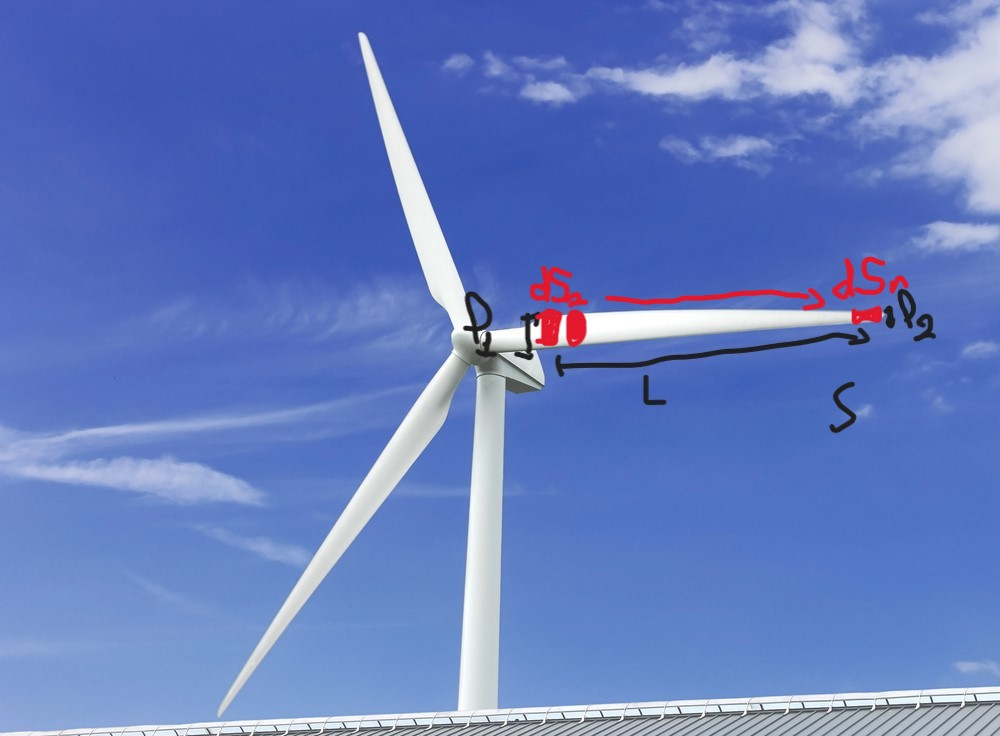

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def force(UrOmega, cl, cd, rho, alpha, longueur, largeur):
  Vr = UrOmega * np.sin(np.deg2rad(alpha)) 
  
  Fl = 0.5 * rho * np.power(Vr, 2) * longueur * largeur * cl
  Fd = 0.5 * rho * np.power(Vr, 2) * longueur * largeur * cd 
  
  Fl = Fl * np.sin(np.deg2rad(alpha)) 
  Fd = Fd * np.cos(np.deg2rad(alpha))
  
  Resultante = Fl + Fd
  return Resultante

def couple(taille, UrOmega, strenght, torque, corde):
  R = np.linspace(0, taille, 100)
  for r in R:
    strenght += force(UrOmega, 0.95, 0.016, 1.225, 6.8, r, corde)
    torque += strenght * r
    r+=1
  torque_final = torque / len(R)
  return torque_final

def puissance_nominale(taille, omega, UrOmega, strenght, torque, corde):
  torque = couple(taille, UrOmega, strenght, torque, corde)
  betz = 16/27
  return torque * omega * betz

Démonstration de l'expression de $V_r$ :

$V_r$ correspondant à la somme en terme de vecteur de U et $r\Omega$.

Pour calculer $r\Omega$, nous utilisons la formule suivante :

$$r\Omega = P_{cercle} * \frac{N}{60}$$


$P_{cercle}$ est le périmètre du cercle parcouru par les pâles

$N$ est le nombre de tours par minute de la pâle

Soit : $P_{cercle} = 2\pi r$ et N = $\frac{2000}{D}$

Ainsi : $$r\Omega = \frac{2000\pi r}{60r} \simeq 105m.s^{-1}$$

On a donc : 

$$\lVert Vr \rVert = \lVert r\Omega \rVert + \lVert U \rVert = U + 105 $$ 

La formule sur N à été obtenu à l'aide des données de cette page :
<a href="https://eolienne.ooreka.fr/astuce/voir/376182/hauteur-d-une-eolienne"> Vitesse des pâles en tour/min </a> 

<ul>
<li> 2000 tour/mn pour un diamètre d'1 m </li>
<li> 1000 tour/mn pour un diamètre de 2 m </li>
<li> 200 tour/mn pour un diamètre de 10 m </li>
<li> 40 tour/mn pour un diamètre de 50 m </li>
</ul>

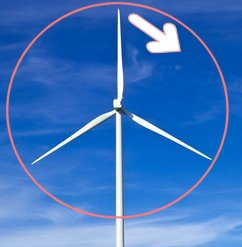

<h3> 2 - Ordre de grandeur </h2>

<p> Dans cette partie, nous allons comparer les grandeurs obtenus par notre modèle par rapport au grandeurs initialements induites par le vent. </p>

Les vitesses angulaires selon la taille des pâles de l'éolienne ont été trouvées sur : <a href="https://eolienne.ooreka.fr/astuce/voir/376182/hauteur-d-une-eolienne"> Vitesse angulaire d'une éolienne <a>

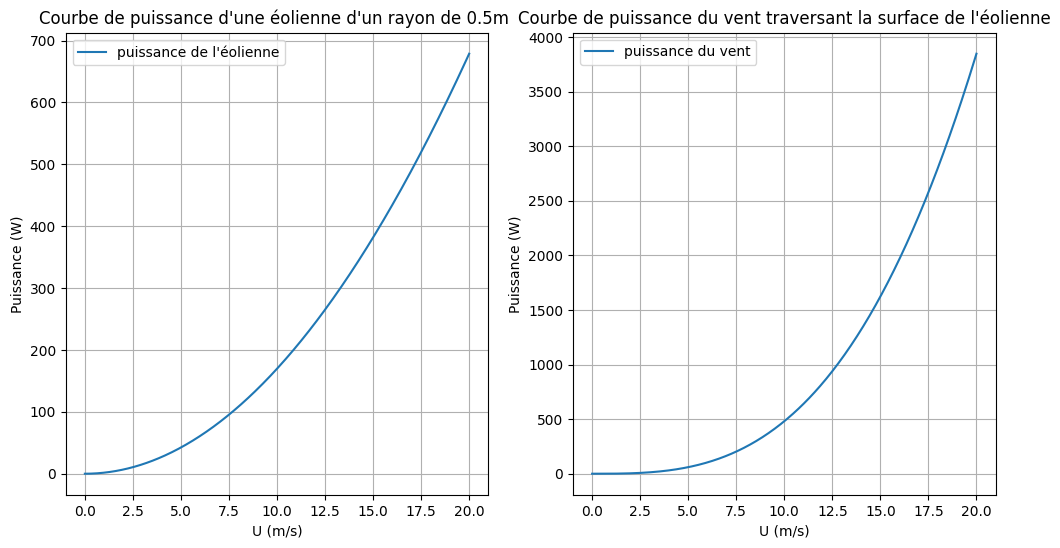

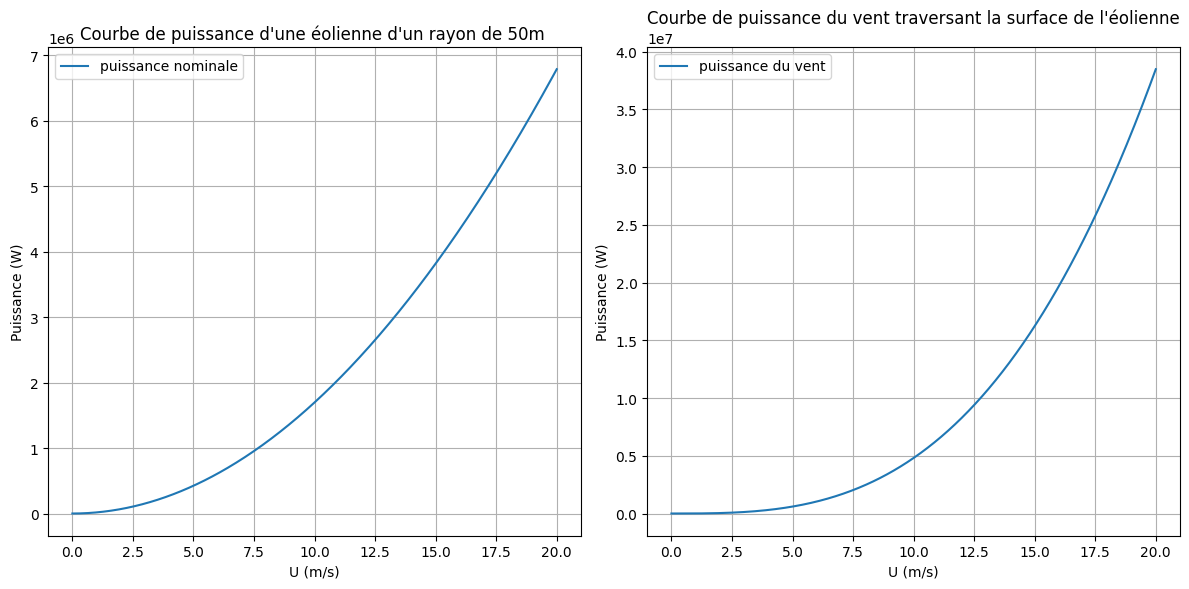

Puissance pour r=0.5m: 679W, Puissance pour r=50m: 6.79MW
Puissance du vent pour r=0.5m: 3848W, Puissance du vent pour r=50m: 38.48MW


In [ ]:
vitesse_vent1 = np.linspace(0, 20, 500)
vitesse_vent = np.linspace(0, 125, 500) # vitesse vent + 105

puissances1 = []
puissances2 = []

longueur_pale1 = 0.5
corde1 = longueur_pale1 * 0.2
omega1 = 210 # 105/0.5

longueur_pale2 = 50
corde2 = longueur_pale2 * 0.2
omega2 = 2.1 

for v in vitesse_vent:
  puissances1.append(puissance_nominale(longueur_pale1, omega1, v, 0, 0, corde1))
  puissances2.append(puissance_nominale(longueur_pale2, omega2, v, 0, 0, corde2))

puissance_vent1 = 0.5 * 1.225* np.pi * puissance(longueur_pale2,2) * puissance(vitesse_vent1,3)
puissance_vent = 0.5 * 1.225 * np.pi * puissance(longueur_pale1,2) * puissance(vitesse_vent1,3)

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(vitesse_vent1, puissances1, label="puissance de l'éolienne")
plt.title("Courbe de puissance d'une éolienne d'un rayon de 0.5m ")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.title("Courbe de puissance du vent traversant la surface de l'éolienne")
plt.plot(vitesse_vent1, puissance_vent, label="puissance du vent")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.legend()
plt.grid()

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(vitesse_vent1, puissances2, label="puissance nominale")
plt.title("Courbe de puissance d'une éolienne d'un rayon de 50m ")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(vitesse_vent1, puissance_vent1, label="puissance du vent")
plt.title("Courbe de puissance du vent traversant la surface de l'éolienne")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

print("Puissance pour r=0.5m: " + str(round(puissances1[499])) + "W, Puissance pour r=50m: " + str(round(puissances2[499]/1E6, 2)) + "MW")
print("Puissance du vent pour r=0.5m: " + str(round(puissance_vent[499])) + "W, Puissance du vent pour r=50m: " + str(round(puissance_vent1[499]/1E6, 2)) + "MW")

La puissance d'une éolienne avec des pâles de 50cm devrait être de 679 W pour un vent de 20 m/s. La puissance du vent à cette vitesse traversant la surface sphérique formé par le mouvement des pâles est de 3 848 W.

La puissance d'une éolienne avec des pâles de 50m devrait être de 6,79 MW pour un vent de 20 m/s. La puissance du vent à cette vitesse traversant la surface sphérique formé par le mouvement des pâles est de 38,48 MW. Soit un rapport de 17.6% dans les deux cas 

Cependant, une éolienne ne se met en marche qu'à partir d'une certaine valeur de vitesse de vent (3 m/s). De plus, dépasser 12 m/s, la puissance stagne. Puis, au-delà de 20 m/s, l'éolienne s'arrête et ne fournit plus de puissance. Voici la forme de la courbe attendue : 

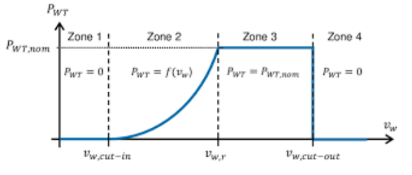

Nous afficherons par la suite des courbes de puissance respectant ce modèle. Les puissances nominales des deux éoliennes précédentes sont donc:

In [ ]:
# on a un linspace de 0 à 20 prenant 500 valeurs, la valeur pour v = 12 m/s se trouve donc à la position 12/20*500=300
print("Puissance nominale pour r=50cm: " + str(round(puissances1[300])) + " W")
print("Puissance nominale pour r=50m: " + str(round(puissances2[300]/1E6, 1)) + " MW")

Puissance nominale pour r=50cm: 245 W
Puissance nominale pour r=50m: 2.5 MW


<h2 ID="Analytique"> <b> III - Méthode analytique </b> </h2>

<h3> 1 - Calcul de puissance </h3>

D'après l'expression de l'énergie cinétique :

$E_c = \frac{1}{2} m v^2$

et de la masse de l'air :

$m = \rho V$

On peut obtenir la fromule suivante :

$$P = E_{c,s} = \frac{1}{2} \cdot \rho_0 \cdot vS \cdot v^2$$

Avec :

- $\rho_0$ la masse volumique de l'air ($kg.m^{-3}$)

- $vS$ le débit voumique d'air ($m^3.s^{-1}$)

- $v$ la vitesse de l'air traversant le système ($m.s^{-1}$)

La puissance récupérable est alors :

$$P_{cinetique} = \frac{1}{2} \rho a S V_{turbine}^3$$

Avec :

- $V_{turbine} = aV_{fluide}$

- S la surface projeté

La puissance maximale récupérable est donc :

$$P_{recuperable} = Betz \cdot P_{cinetique} = \frac{16}{27} \frac{\rho S v^3}{2}$$

Courbe de puissance d'une éolienne d'un rayon égale à 50cm :

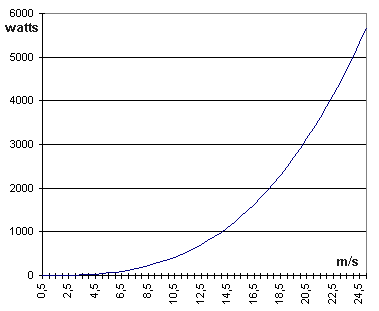

Sachant que la puissance est bloquée au-delà de 12m/s, on trouve une puissance nominale de l'ordre de 500 W.

<h3> 2 - Grandeurs remarquables </h3>

Quelques grandeurs de puissance pour des tailles d'éoliennes caractéristiques

<ul>
<li> 400 W pour r=50cm </li>
<li> 1.6 kW pour r = 1m </li>
<li> 2.5 kW pour r = 2.5m </li>
<li> 300 kW pour r = 15m </li>
<li> 3 MW pour r = 50m </li>
<li> 8 MW pour r = 75m </li>
</ul> 

sources : 

<a href="https://eolienne.ooreka.fr/astuce/voir/376182/hauteur-d-une-eolienne"> Hauteur d'une éolienne </a>

<a href="https://eolienne.ooreka.fr/astuce/voir/352953/puissance-eolienne#:~:text=Petites%20%C3%A9oliennes%20%3A%20diam%C3%A8tre%20de%20rotor%20de%202,125%20m%20%3A%20350%20kW%20%C3%A0%205%20MW"> Puissance d'une éolienne </a>

Affichage de la courbe de puissance en fonction de la taille des pâles:

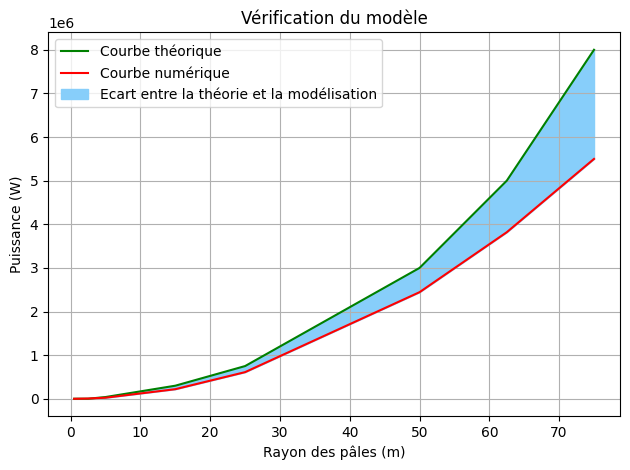

In [ ]:
X = [0.5, 1, 2.5, 5, 15, 25, 50, 62.5, 75]
P = [400, 1600, 1000, 40000, 300000, 750000, 3000000, 5000000, 8000000]

Puissance_rayon = []
for r in X:
  Puissance_rayon.append(puissance_nominale(r, 105/r, 75, 0, 0, r*0.2))

# omega ~ 105/r provient du calcul fait en introduction
# corde ~ r*0.15 correspond à des grandes éoliennes
# v = 12 m/s car au-delà la puissance n'augmente plus 

plt.plot(X, P, color='g', label='Courbe théorique')
plt.plot(X, Puissance_rayon, color='r', label='Courbe numérique')
plt.fill_between(X, P, Puissance_rayon, color='lightskyblue', label='Ecart entre la théorie et la modélisation')
plt.title("Vérification du modèle")
plt.xlabel("Rayon des pâles (m)")
plt.ylabel("Puissance (W)")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

Notre courbe suit bien la courbe théorique attendu. On remarque cependant que l'erreur augmente avec la taille de l'éolienne.

<h2 ID="Conclusion"> <b> IV - Conclusion </b> </h2>

<h3> 1 - Comparaison des modèles </h3>

Comparaison des valeurs de puissance pour une éolienne domestique ayant un rotor d'un rayon de 50 centimètres :
<ul>
<li>D'après le modèle numérique, nous trouvons une valeur de puissance maximale de l'ordre de 250W. </li>
<li> D'après le modèle analytique, nous trouvons une valeur de puissance de l'ordre de 500W. </li>
<li> D'après des données constructeurs trouvées en ligne, la puissance est de l'ordre de 400W. </li>

La puissance obtenu par notre modèle numérique est assez proche des valeurs théoriques. En effet, il est difficile de trouvé des valeurs en lignes puisque celles ci sont tout le temps différentes selon si l'on parle de puissance nominale, de puissance récuperable où si la taille correspond au diamètre ou au rayon du rotor. Ces paramètres ne sont pas toujours clairement détaillés ainsi, il est difficile de trouver une valeure précise de puissance à obtenir. Nous considérerons donc nos résultats valides s'ils sont de la même puissance de 10 que les valeurs trouvés en ligne.

Pour une éolienne d'un rayon de de 50m, nous sommes plutôt proche du résultat attendu. En effet, la puissance attendu est de 3 MW. Avec notre modèle nous obtenons une puissance de 2.5 MW. L'erreur devient importante au-delà de 50m

<h3> 2 - Une éolienne pour alimenter un foyer </h3>

Les éoliennes domestiques ont généralement un rayon compris entre 1m et 5m.

D'après le site d'EDF, la puissance électrique d'un foyer de 60$m^2$ est de l'ordre de 6 kVA.

Voyons si d'après notre modèle numérique, la puissance nominale fournit par notre éolienne serait suffisante pour alimenter ce foyer.

source :
<a href="https://particuliers.engie.fr/electricite/conseils-electricite/conseils-contrat-electricite/quelle-puissance-electrique-maison.html"> Puissance d'un foyer </a>

Eolienne d'un rayon d'1m ayant une vitesse angulaire de 105 rad/s :

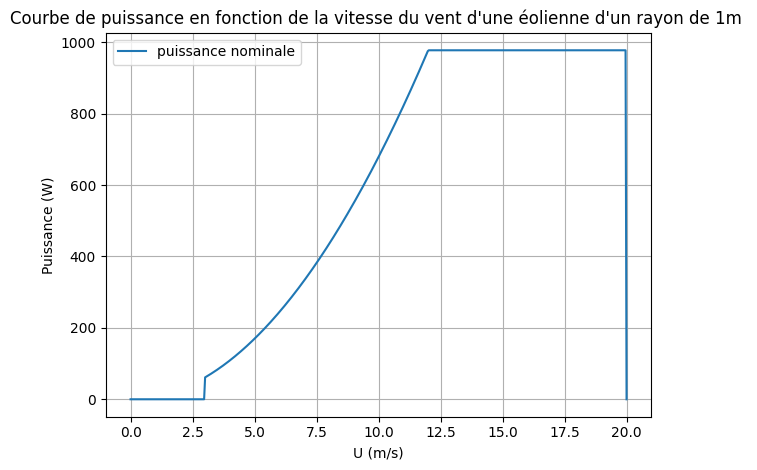

In [ ]:
vitesse_vent3 = np.linspace(0, 20, 500)
vitesse_relatif_vent3 = np.linspace(0, 125, 500) 
puissances3 = []

cut_in_speed = 3/20*125
cut = 12/20*125
cut_out_speed = 20/20*125

longueur_pale3 = 1
corde3 = longueur_pale3 * 0.2
omega3 = 105

for v in vitesse_relatif_vent3 :
    if v < cut_in_speed:
        puissances3.append(0)
    elif cut_in_speed <= v < cut:
        puissances3.append(puissance_nominale(longueur_pale3, omega3, v, 0, 0, corde3))
    elif cut <= v < cut_out_speed:
        puissances3.append(puissance_nominale(longueur_pale3, omega3, cut, 0, 0, corde3))
    elif v >= cut_out_speed:
        puissances3.append(0)

plt.plot(vitesse_vent3, puissances3, label="puissance nominale")
plt.title("Courbe de puissance en fonction de la vitesse du vent d'une éolienne d'un rayon de 1m ")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

Courbe de puissance d'une éolienne d'un rayon de 5m ayant une vitesse angulaire de 21 rad/s

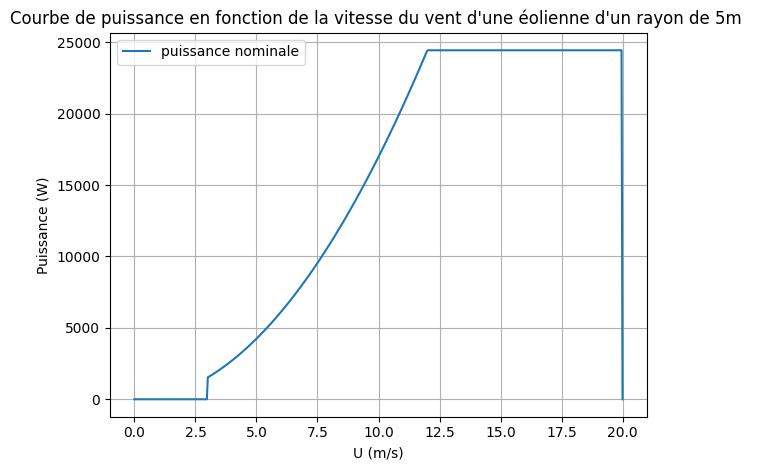

In [ ]:
vitesse_vent4 = np.linspace(0, 20, 500)
vitesse_relatif_vent4 = np.linspace(0, 125, 500) 
puissances4 = []

longueur_pale4 = 5
corde4 = longueur_pale4 * 0.2
omega4 = 21

for v in vitesse_relatif_vent4 :
    if v < cut_in_speed:
        puissances4.append(0)
    elif cut_in_speed <= v < cut:
        puissances4.append(puissance_nominale(longueur_pale4, omega4, v, 0, 0, corde4))
    elif cut <= v < cut_out_speed:
        puissances4.append(puissance_nominale(longueur_pale4, omega4, cut, 0, 0, corde4))
    elif v >= cut_out_speed:
        puissances4.append(0)

plt.plot(vitesse_vent4, puissances4, label="puissance nominale")
plt.title("Courbe de puissance en fonction de la vitesse du vent d'une éolienne d'un rayon de 5m ")
plt.xlabel('U (m/s)')
plt.ylabel('Puissance (W)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

D'après notre modèle numérique, la puissance nominale fournit par une éolienne ayant un rayon compris entre 1m et 5m est comprise entre 1kW et 25kW.

Sachant que la puissance demandée par notre foyer est de 6 kVA, l'éolienne devrait pouvoir alimenter ce foyer en électricité si elle tournait en permanence. Dans la réalité, une éolienne ne fournit pas sa puissance maximale en permanence. Pour pouvoir conclure, nous devons calculer la densité de puissance.

<b> Calcul de la densité de puissance </b>

La vitesse du vent suit la densité de probabilité de la loi de Rayleigh :

$$f(x, σ^2) = \frac{x}{\sigma^2}exp(-\frac{x^2}{2\sigma^2})$$

Ainsi, pour obtenir l'énergie fournit sur une année, il suffit de multiplier la puissance de l'éolienne par la répartition de Rayleigh et par le nombre d'heure en une année.

source :
<a href="https://fr.wikipedia.org/wiki/Loi_de_Rayleigh"> Loi de Rayleigh </a>

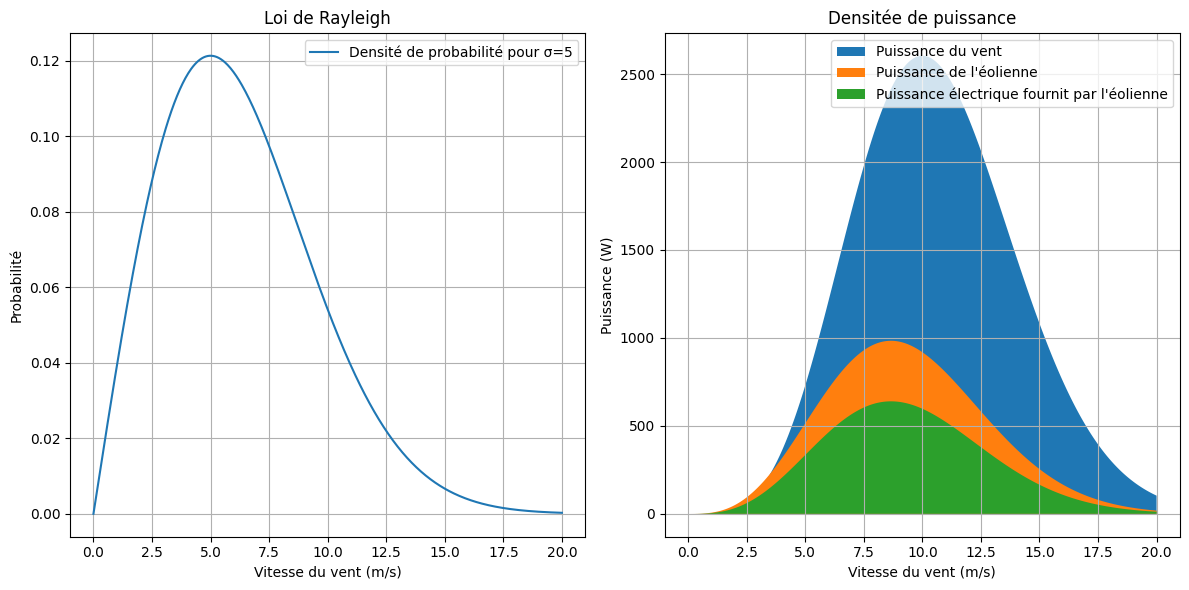

In [ ]:
wind_speed = np.linspace(0, 20, 500)
wind_rel_speed = np.linspace(0, 125, 500)

# sigma est différent selon l'emplacement de l'éolienne
def Rayleigh(x):
    c = 5
    y = x/c**2 * np.exp(-x**2/(2*c**2))
    return y

puissance_wind = 0.5 * 1.225 * np.pi * puissance(longueur_pale4, 2) * puissance(wind_speed,3) * Rayleigh(wind_speed)
puissance_eol = puissance_nominale(longueur_pale4, omega4, wind_rel_speed, 0, 0, corde4) * Rayleigh(wind_speed)
puissance_elec = puissance_eol * 0.65
# le rendement d'une éolienne est de l'ordre de 65%

plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.plot(wind_speed, Rayleigh(wind_speed), label="Densité de probabilité pour σ=5")
plt.xlabel("Vitesse du vent (m/s)")
plt.ylabel("Probabilité")
plt.title("Loi de Rayleigh")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.fill_between(wind_speed, puissance_wind, label="Puissance du vent")
plt.fill_between(wind_speed, puissance_eol, label="Puissance de l'éolienne")
plt.fill_between(wind_speed, puissance_elec, label="Puissance électrique fournit par l'éolienne")
plt.xlabel("Vitesse du vent (m/s)")
plt.ylabel("Puissance (W)")
plt.title("Densitée de puissance")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

<b> Clacul de l'énergie produite sur une année : </b>

In [ ]:
puissance_reelle=0
for i in range(len(puissance_eol)):
  puissance_reelle += puissance_eol[i]
  i+=1
energie = puissance_reelle * 365.25 * 24 /len(puissance_eol)
print("L'énergie annuelle produite par l'éolienne est: " + str(round(energie/1000)) + " kWh")

L'énergie annuelle produite par l'éolienne est: 3700 kWh


<b> La consommation d'une maison par an est comprise entre 5 000 kWh (avec gaz) et 15 000 kWh (tout électrique). Une éolienne ayant des pâles de 5m produit une énergie de 3 700 kWh pendant une année. Ainsi, une éolienne de ce type peut produire en moyenne un peu moins de 40% de l'énergie consommée par an par le foyer moyen français. </b>

<h3> 3 - Les limites de notre modèle numérique </h3>

<ol>
<li> Nous avons considéré que le vent était perpendiculaire à notre pâle ce qui n'est pas toujours le cas </li>
<li> Nous avons considérer la corde constante sur toute la pâle </li>
<li> Nous avons considéré le flux d'air homogène le long de la pâle ce qui peut être faux pour des grandes éoliennes </li>
<li> Nous ne prenons pas en compte les effets de turbulence et de sillage </li>
<li> Nous avons fixé la masse volumique de l'air, or cette valeur varie selon la température, l'altitude. </li>
</ol>

Pistes pour la partie 2 : Nous voulons adaptés notre fonction puissance pour calculer les puissances produites par une centrale nucléaire et un barrage. En effet, ces systèmes utilisent le même principe qu'une éolienne, il s'agit d'un fluide en mouvement qui fait tourner une turbine. Cela nous permettrait de pouvoir calculer la taille minimale d'un champs d'éoliennes pour remplacer une centrale nucléaire/un barrage. 

Sources annexes :

<a href = "https://www.totalenergies.fr/particuliers/parlons-energie/dossiers-energie/energie-renouvelable/connaitre-la-puissance-d-une-eolienne"> Connaitre la puissance d'une éolienne/ totalenergie <a>

<a href = "https://www.edf.fr/groupe-edf/espaces-dedies/l-energie-de-a-a-z/tout-sur-l-energie/produire-de-l-electricite/le-fonctionnement-d-une-eolienne"> Le fonctionnement d'une éolienne / EDF </a>

<a href="http://chimphys.online.fr/templates/mpicptcapteurballon/eolienne.pdf"> Eolienne </a>

<a href="https://www.m-habitat.fr/choisir-son-energie/eolienne/vitesse-d-une-eolienne-domestique-491_A"> Vitesse d'une éolienne domestique </a>

<a href = "https://eolienne.ooreka.fr/astuce/voir/413619/moteur-d-une-eolienne"> Moteur d'une éolienne </a>

<a href = "http://www.michamps4b.be/pedagogie-eolienne-calcul-vitesse.php"> Vitesse des pâles d'une éolienne </a>

<a href = "http://perso.univ-lemans.fr/~fcalvay/mnpm/projet-eolienne.pdf"> Détermination de la zone la plus sollicité sur les pâles d'une éolienne / univ le mans </a>

<a href = "https://www.capitaine-energie.com/fiches-pratiques/consommation-electrique-dun-foyer/#:~:text=La%20consommation%20%C3%A9lectrique%20d%E2%80%99un%20foyer%20en%20France%20On,du%20gaz%2C%20elle%20est%20d%E2%80%99environ%204500%20kWhpar%20an."> Consommation électrique d'un foyer </a>